In [7]:
from alphaflow import Node, make_node
import math

In [8]:
class Factorial(Node):
    @make_node
    def __init__(self, n, **kwargs):
        super().__init__()
        self.n = n


    def evaluate(self):
        return math.factorial(self.n)

    
class Add(Node):
    @make_node
    def __init__(self, a, b, **kwargs):
        super().__init__()
        self.a = a
        self.b = b


    def evaluate(self):
        return self.a.value() + self.b.value()

In [9]:
a = Factorial(5, name = 'F5!')
b = Factorial(6, name = 'F6!')
c = Add(a, b)

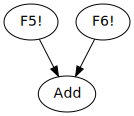

In [11]:
c.get_dag()